In [1]:
import healpy as h

%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [11]:
mask=h.read_map("../datain/mask_gal70_nside512.fits",verbose=False)
bmask=zeros(size(mask),float) ; bmask[mask>0.99999]=1.
teb=h.read_map("../dataout/map_TEB.fits",(0,1,2))
tebalm=h.map2alm(teb,lmax=1024,pol=False)

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [3]:
for i in range(size(tebalm[0])):
    ell=h.Alm.getlm(1024,i)[0]
    if ell>1:
        f=sqrt(1./((ell+2)*(ell+1)*(ell-1)*ell))
    else:
        f=0.
    tebalm[1][i]=tebalm[1][i]*f
    tebalm[2][i]=tebalm[2][i]*f
    
teb=h.alm2map(tebalm,nside=512,pol=False)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


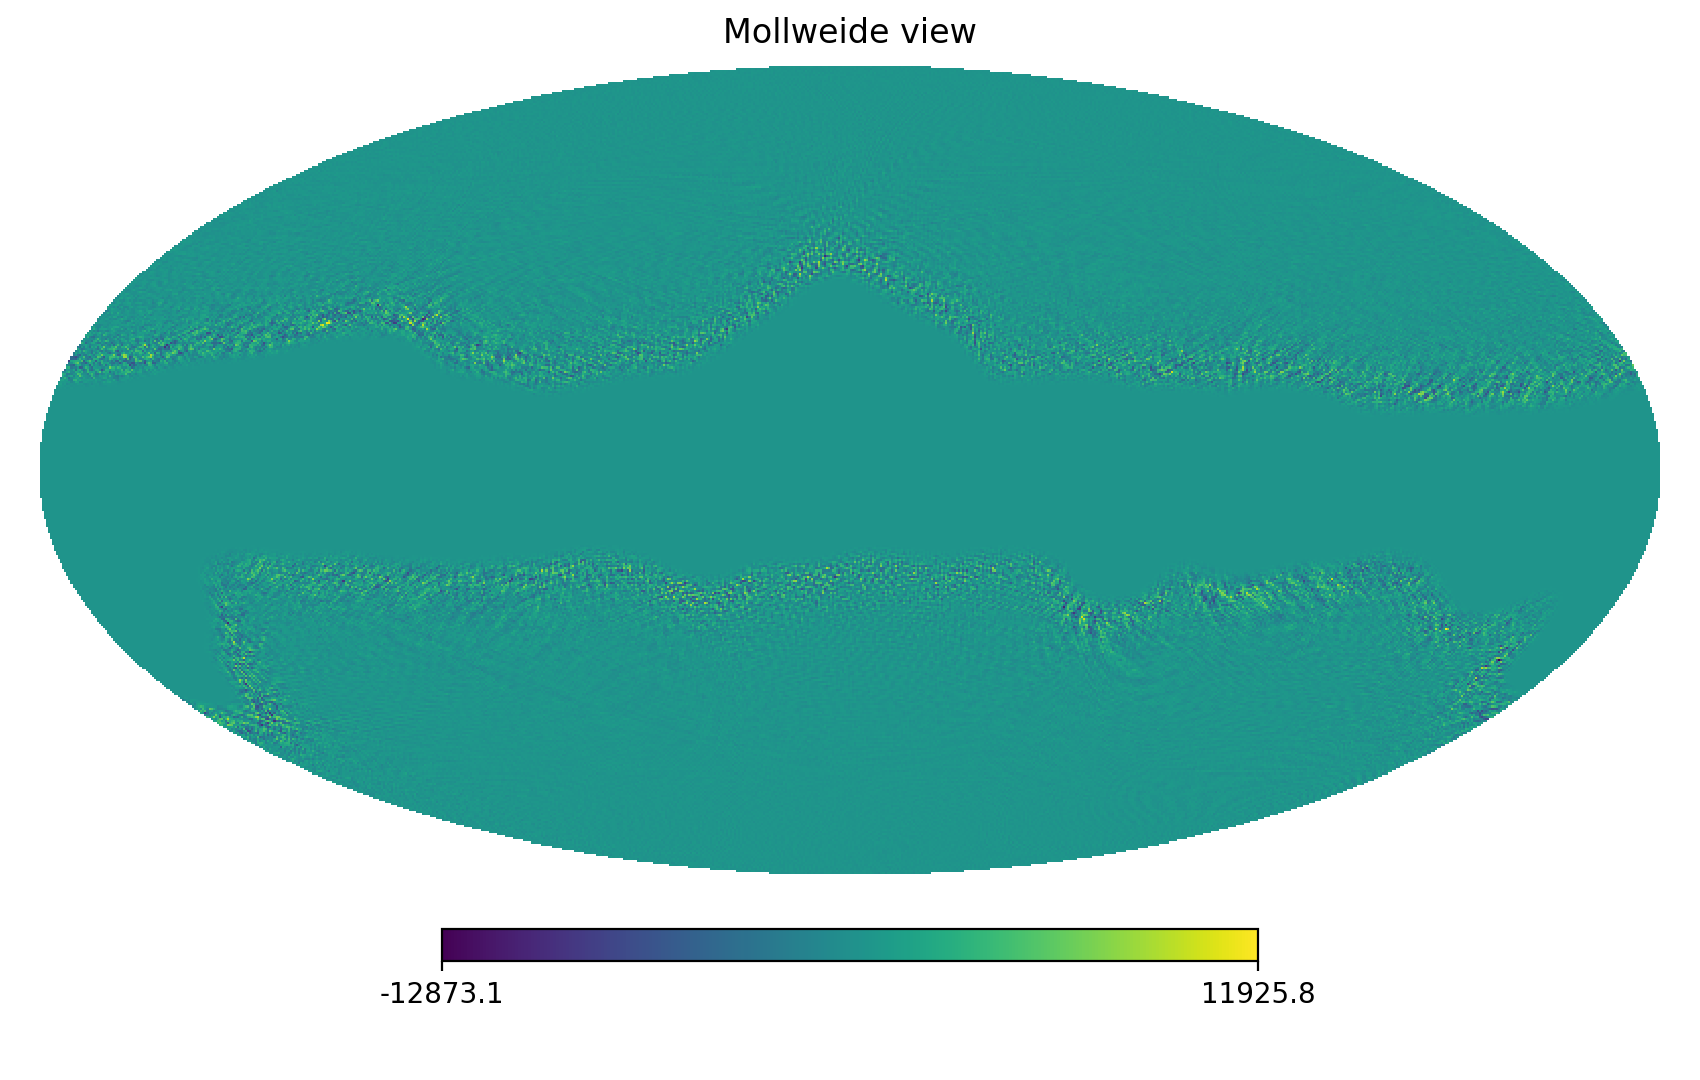

In [12]:
h.mollview(teb[2],rot=(0,0))

In [5]:
badmask=zeros(size(mask),float) ; badmask[mask>1e-6]=1.
tqu=h.read_map("../datain/map.fits",(0,1,2),verbose=False)
teb2alm=h.map2alm(tqu*mask,lmax=1024,pol=True)
teb2=h.alm2map(teb2alm,nside=512,pol=False,verbose=False)

<IPython.core.display.Javascript object>


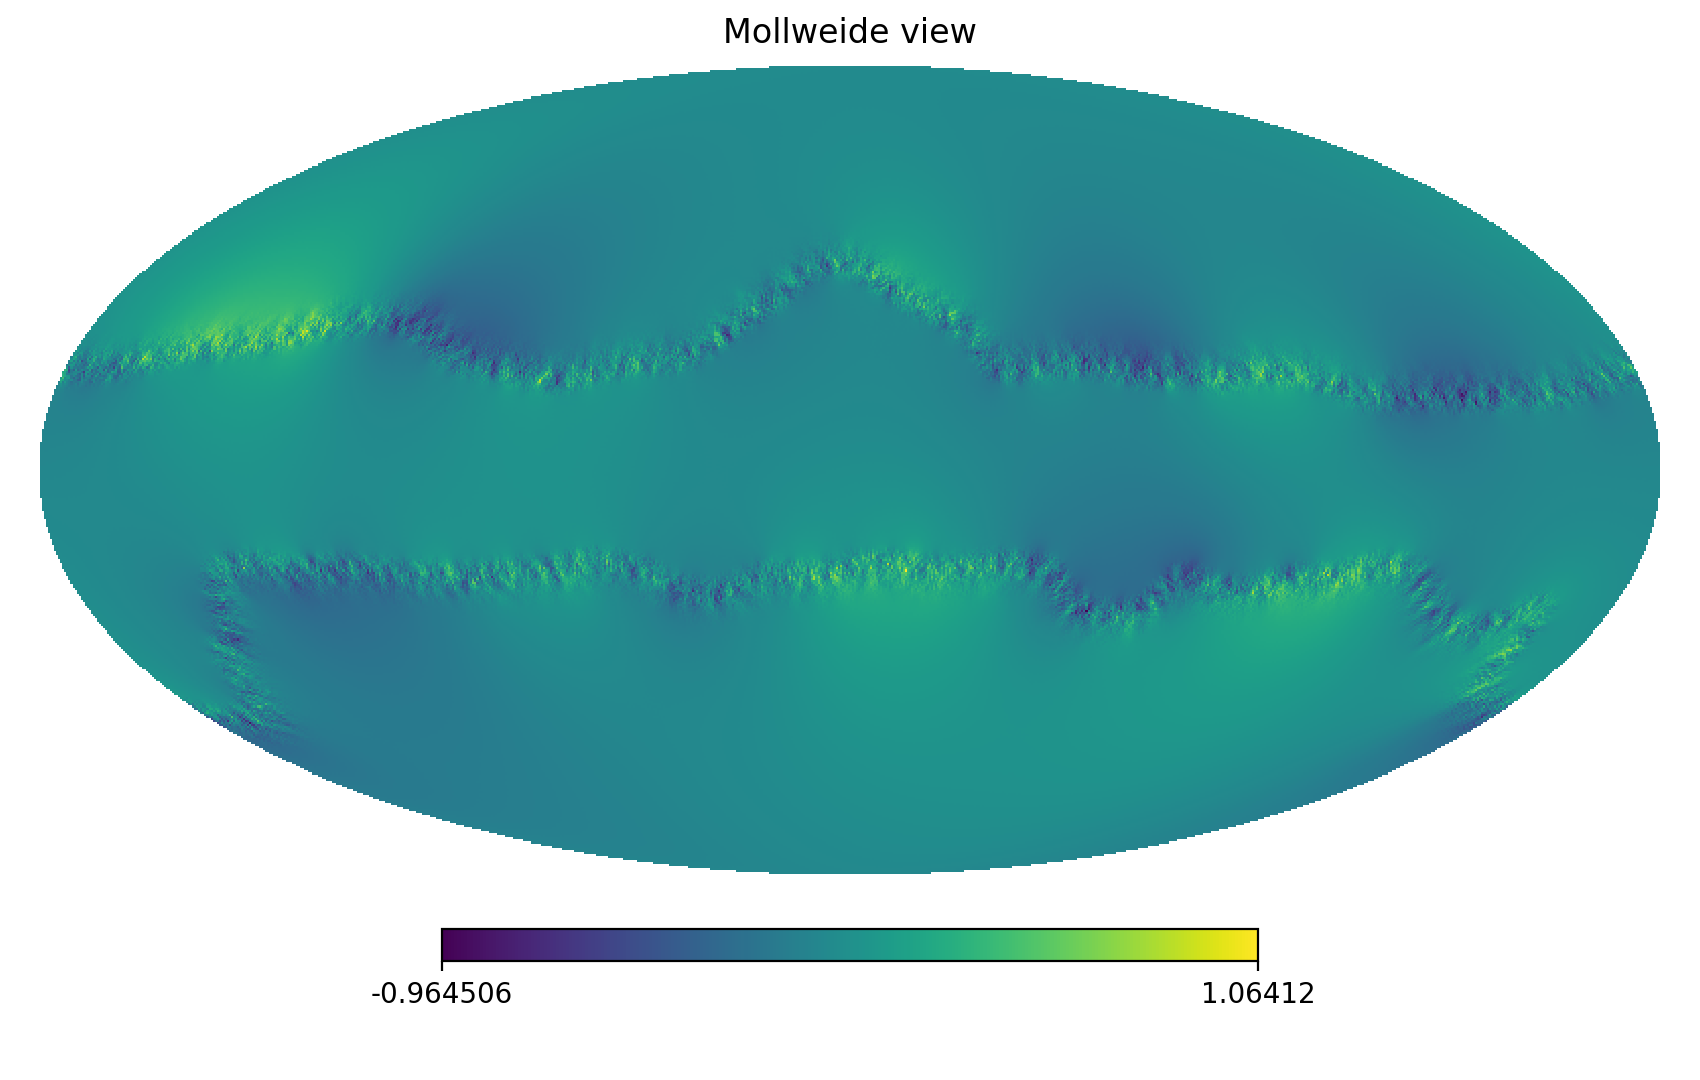

In [6]:
h.mollview(teb2[2])

In [7]:
m=h.read_map("../datain/map.fits",(0,1,2))
teb1alm=h.map2alm(m,lmax=1024,pol=True)
teb1=h.alm2map(teb1alm,512,pol=False)

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [8]:
clb=h.alm2cl(tebalm[2])
clb1=h.alm2cl(teb1alm[2])
clb2=h.alm2cl(teb2alm[2])

<IPython.core.display.Javascript object>


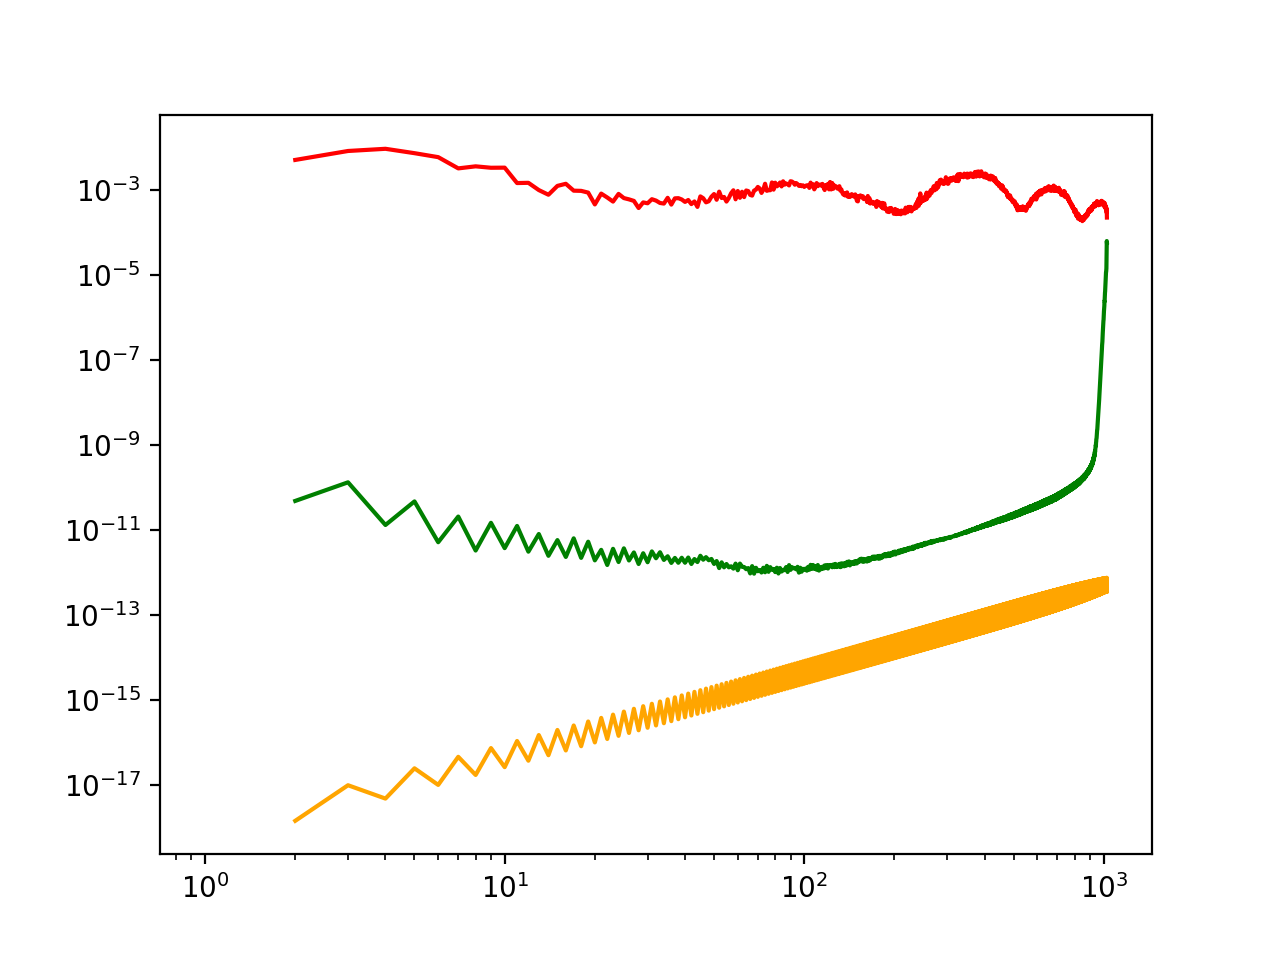

[]

In [10]:
figure()
ell=arange(1025)
f=ell*(ell+1)/(2.*pi)
plot(ell,f*clb,"g-")
plot(ell,f*clb1,c="orange")
plot(ell,f*clb2,"r-")
loglog()